<div style="background-color:#004d99; color:white; padding:30px; BORDER-radius:10px; text-align:center;">
  <h1 style="margin:0; font-size:1.8em;">Your task here is to find answers for the tasks in the Project 3 Customer survey insights.txt</h1>
</div>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from textblob import TextBlob
import nltk #for Natural Language Processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

## Step-by-Step Questions:

In [6]:
df=pd.read_csv("survey_feedback.csv")

### Load and clean the dataset  and Check for missing Feedback_Text entries.

In [8]:
df[:3]

,Response_ID,Rating,Feedback_Text,Age,Gender,Region
0,dbe04294-a5cc-4320-a7bc-1ccbe58db588,1.0,Always pressure at from letter buy will.,19.0,Male,Coast
1,3abf1eb3-afa1-453c-885b-1ad414d2e7ca,NaN,NaN,32.0,Other,Western
2,1eb348f3-87ec-4d15-8fb9-3db44e537efa,1.0,Decision system door keep suffer ground else l...,52.0,Male,Nyanza


In [9]:
df.dtypes

Response_ID       object
Rating           float64
Feedback_Text     object
Age              float64
Gender            object
Region            object
dtype: object

In [10]:
df.shape

(800, 6)

In [11]:
df.isnull().sum()

Response_ID      16
Rating           16
Feedback_Text    16
Age              16
Gender           16
Region           16
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df=df.dropna()

In [14]:
df.shape

(710, 6)

### Convert Rating into categories (Poor, Fair, Good, Excellent).

In [16]:
df["Rating"].value_counts()

Rating
4.0    153
1.0    152
3.0    138
5.0    135
2.0    132
Name: count, dtype: int64

In [17]:
df["Rating"]=df["Rating"].astype(str)
df["Rating"]=np.where(df["Rating"] == '5.0', 'EXCELLENT', np.where(df["Rating"] == '4.0', 'GOOD',
np.where(df["Rating"] == '3.0','FAIR', np.where(df["Rating"] == '2.0','POOR', 'VERY_POOR'))))

In [18]:
df["Rating"].value_counts()

Rating
GOOD         153
VERY_POOR    152
FAIR         138
EXCELLENT    135
POOR         132
Name: count, dtype: int64

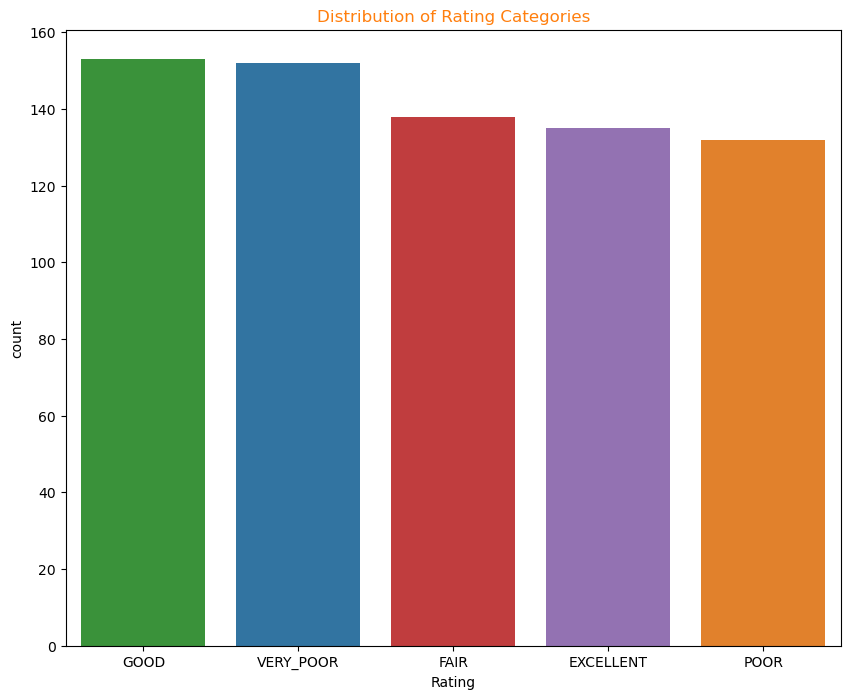

In [19]:
# Visualize rating distribution
plt.figure(figsize=(10, 8))
sns.countplot(df, x='Rating', order=['GOOD', 'VERY_POOR', 'FAIR', 'EXCELLENT', 'POOR'], hue='Rating')
plt.title('Distribution of Rating Categories', color='C1')
#plt.savefig('rating_distribution.png')
plt.show()

### Intermediate (Text & Sentiment Analysis)

### Perform sentiment analysis using TextBlob.

In [22]:
# Calculate sentiment polarity
def get_sentiment(text):
    if isinstance(text, str):  # Check if text is not NaN
        return TextBlob(text).sentiment.polarity
    return 0
df['Sentiment'] = df['Feedback_Text'].apply(get_sentiment)

In [23]:
# Categorize sentiment
def categorize_sentiment(score):
    if score < -0.5: return 'Very Negative'
    elif -0.5 <= score < 0: return 'Negative'
    elif score == 0: return 'Neutral'
    elif 0 < score <= 0.5: return 'Positive'
    else: return 'Very Positive'

df['Sentiment_Category'] = df['Sentiment'].apply(categorize_sentiment)

### Visualize sentiment distribution.

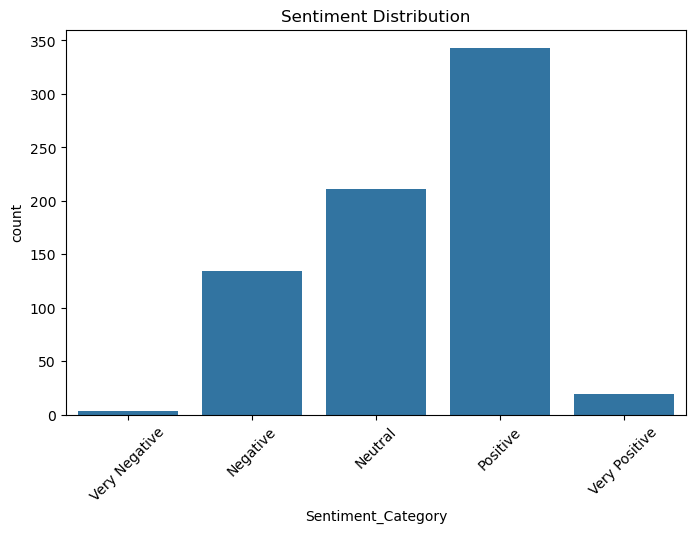

In [25]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(df, x='Sentiment_Category', order=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'])
plt.title('Sentiment Distribution')
plt.xticks(rotation=45)
#plt.savefig('sentiment_distribution.png')
plt.show()

### Find the most common words using WordCloud.

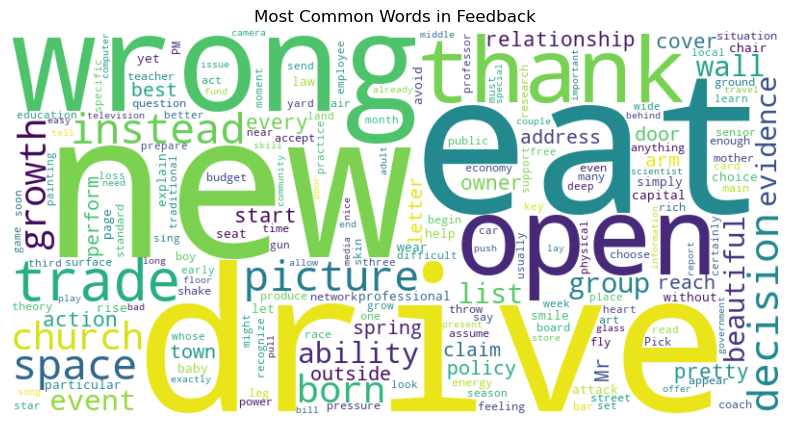

In [27]:
# Combine all feedback text
all_text = ' '.join(df['Feedback_Text'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Feedback')
#plt.savefig('wordcloud.png')
plt.show()

### Compare ratings by Gender or Region.

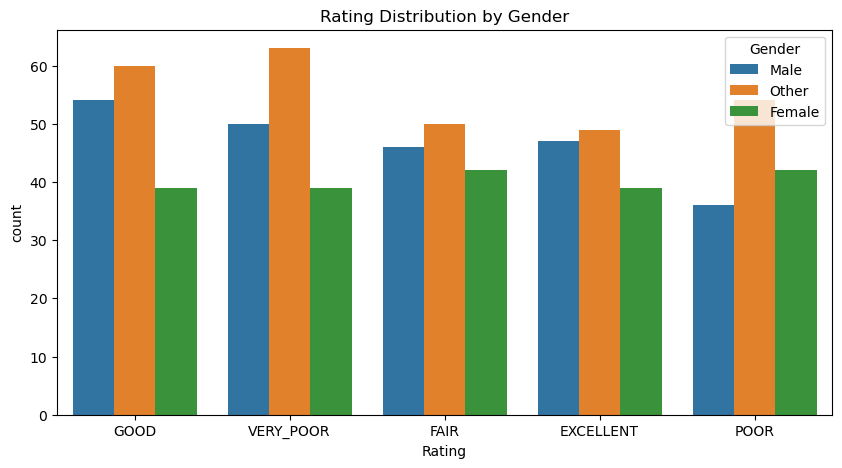

In [29]:
## Step 5: Compare Ratings by Gender and Region
# Compare ratings by Gender
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Rating', hue='Gender', order=['GOOD', 'VERY_POOR', 'FAIR', 'EXCELLENT', 'POOR'])
plt.title('Rating Distribution by Gender')
#plt.savefig('ratings_by_gender.png')
plt.show()

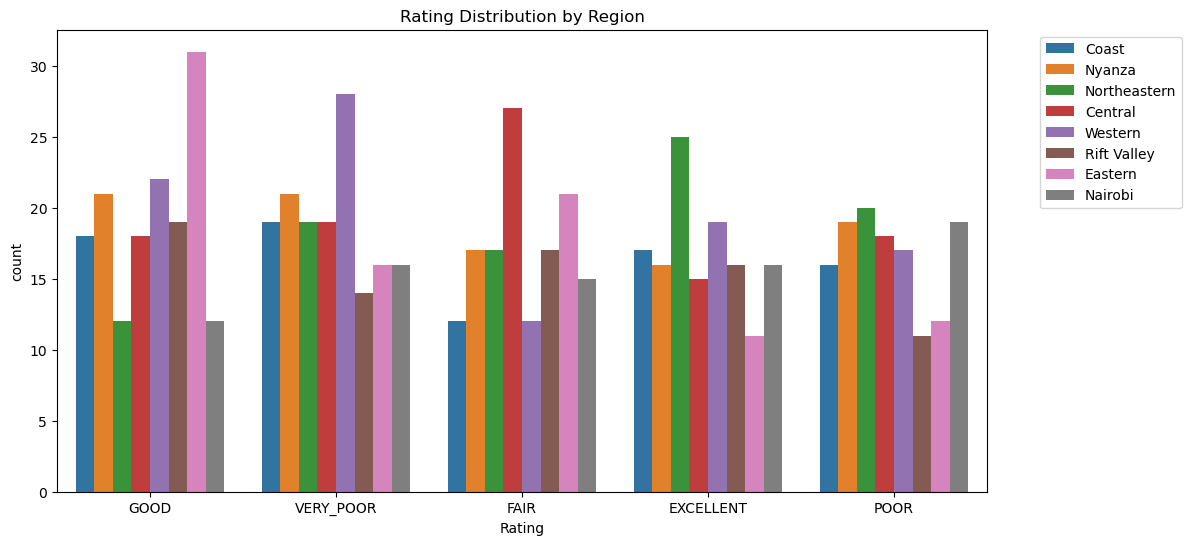

In [30]:
# Compare ratings by Region
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Rating', hue='Region', order=['GOOD', 'VERY_POOR', 'FAIR', 'EXCELLENT', 'POOR'])
plt.title('Rating Distribution by Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig('ratings_by_region.png')
plt.show()

## Advanced (NLP & Automation)

#### **OPTIONAL**

### **what is nlkt?? The Natural Language Toolkit (NLTK) used for NLP**

In [ ]:
nltk??

In [ ]:
#Apply TF-IDF to extract key themes.
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100, stop_words='english')

# Fit and transform the cleaned text
tfidf_matrix = tfidf.fit_transform(df['Cleaned_Text'].dropna())

# Get feature names
feature_names = tfidf.get_feature_names_out()

# Create DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Get top words by average TF-IDF score
top_words = tfidf_df.mean().sort_values(ascending=False).head(20)

# Visualize top words
plt.figure(figsize=(10, 6))
top_words.plot(kind='barh')
plt.title('Top Words by TF-IDF Score')
plt.xlabel('Average TF-IDF Score')
plt.savefig('top_tfidf_words.png')
plt.show()

In [ ]:
#Build a simple sentiment classifier.
# Prepare data for classification
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 1 if x > 0 else (0 if x == 0 else -1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Cleaned_Text'], df['Sentiment_Label'], test_size=0.2, random_state=42
)

# Create TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = classifier.predict(X_test_tfidf)

# Evaluate classifier
print(classification_report(y_test, y_pred))

# Save classification report to file
with open('classification_report.txt', 'w') as f:
    f.write(classification_report(y_test, y_pred))

### Step 9: Automation Script

Create a file `run_analysis.py` to automate the entire process:

## **THANK YOU**